BASIC LOGISTIC REGRESSION


In [41]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
from sklearn.preprocessing import StandardScaler



In [42]:
#create a simple dataset

hours=np.array([1,2,3,4,5,6,7,8,9]).reshape(-1, 1)
Pass= np.array([0,0,0,0,1,1,1,1,1])

df_t=pd.DataFrame({
    "Hours_Study":hours.flatten(),
    "Pass_Exam":Pass
})

df_t

,Hours_Study,Pass_Exam
0,1,0
1,2,0
2,3,0
3,4,0
4,5,1
5,6,1
6,7,1
7,8,1
8,9,1


In [43]:
#Fit logistic regression on the toy data set

model=LogisticRegression()
model.fit(hours,Pass)


LogisticRegression()

In [44]:
print("Intercept :",model.intercept_)
print("Coefficient :",model.coef_)

Intercept : [-5.29559243]
Coefficient : [[1.17808562]]


In [45]:
#predict probabilities for a range of study hours 

hours_grid=np.linspace(0,10,200).reshape(-1,1)
pass_prob= model.predict_proba(hours_grid)[:,1]# for result 1 we create probability

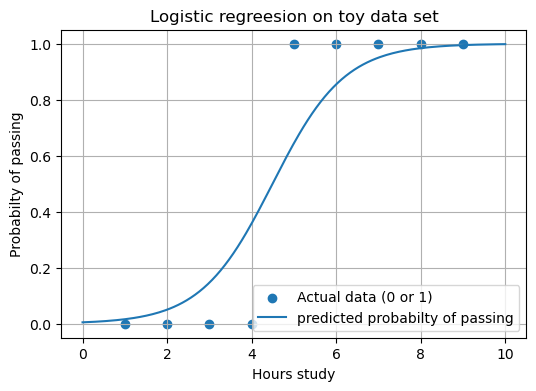

In [46]:
#plot data points and probability curve 
plt.figure(figsize=(6,4))
plt.scatter(hours,Pass,label="Actual data (0 or 1)")

plt.plot(hours_grid,pass_prob,label="predicted probabilty of passing")
plt.xlabel("Hours study")
plt.ylabel("Probabilty of passing")

plt.title ("Logistic regreesion on toy data set")
plt.legend()
plt.grid(True)

here in this grap show us the 0.5 below is fail and avobe this is pass it shows us the 

here our threshold is 0.5

In [47]:
#predict few for example student

example_Hours=np.array([[2],[4],[6],[8]])
example_prob=model.predict_proba(example_Hours)[:,1]

example_pred=model.predict(example_Hours)

df=pd.DataFrame({

    "hours_studied":example_Hours.flatten(),
    'Predicted_proba_Pass':np.round(example_prob,4),
    'predicted_class':example_pred
})
df

,hours_studied,Predicted_proba_Pass,predicted_class
0,2,0.0502,0
1,4,0.3582,0
2,6,0.8548,1
3,8,0.9842,1


SIGMOID FUNCTION

In [48]:
#SIGMOID FUNCTION

def sigmoid(z):
    return 1/(1+np.exp(-z))


#check some values 

z_values=np.array([-5,-2,-1,0,1,2,5],dtype=float)

sig_values=sigmoid(z_values)

sig_df=pd.DataFrame({

    'z':z_values,
    "sigmoid(z)":np.round(sig_values,4)
})

sig_df



,z,sigmoid(z)
0,-5.0,0.0067
1,-2.0,0.1192
2,-1.0,0.2689
3,0.0,0.5000
4,1.0,0.7311
5,2.0,0.8808
6,5.0,0.9933


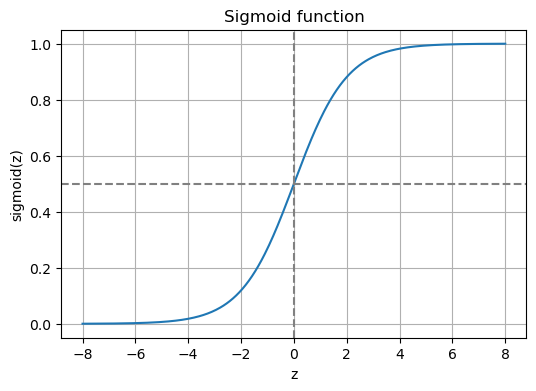

In [49]:
# Plot the sigmoid curve
z_grid = np.linspace(-8, 8, 400)
sig_grid = sigmoid(z_grid)

plt.figure(figsize=(6, 4))
plt.plot(z_grid, sig_grid)
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.title("Sigmoid function")
plt.grid(True)
plt.axhline(0.5, color="gray", linestyle="--")
plt.axvline(0, color="gray", linestyle="--")
plt.show()

In [50]:
# Simple threshold demonstration
probabilities = np.array([0.1, 0.3, 0.49, 0.5, 0.7, 0.9])
threshold = 0.5
pred_class = (probabilities >= threshold).astype(int)

thresh_df = pd.DataFrame({
    "probability": probabilities,
    "class_at_threshold_0.5": pred_class
})
thresh_df

,probability,class_at_threshold_0.5
0,0.10,0
1,0.30,0
2,0.49,0
3,0.50,1
4,0.70,1
5,0.90,1


here in this part we set  a threshold to predict the actual values is the number is we set as 0.3 above o.3 its classify it as a class A below this treshold its classfy as it class B 


we can change the threshold if we want 


NEgative ar jonno amra 0.5 ar  niche value pabo and 0.5 ar upore 1 ar kacha kachi man pabo

Notes:

Sigmoid is a smooth S shaped function that takes any score and turns it into a probability.

At z = 0, probability is 0.5.
Values far below 0 map close to 0, and far above 0 map close to 1.

The model first gives a score z, then passes it through sigmoid to get probability, which is how logistic regression works.

LOGISTIC REGRESSION  WITH REAL DATA SET

In [51]:
df_b=pd.read_csv("breast.csv")
df_b.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [52]:
data=load_breast_cancer()
x_full = data.data

y_full = data.target
print("feature matrix shape is :",x_full.shape)
print("Target shape :",y_full.shape)
print("Classes :",data.target_names)


feature matrix shape is : (569, 30)
Target shape : (569,)
Classes : ['malignant' 'benign']


In [53]:
#create a Dataframe for easier exploration 
features_name=data.feature_names
df=pd.DataFrame(x_full,columns=features_name)
df['target']=y_full

df.head(5)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [54]:
df.shape

(569, 31)

In [55]:
df.describe().T.head(5)

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.7800,28.1100
mean texture,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.8000,39.2800
mean perimeter,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.1000,188.5000
mean area,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.7000,2501.0000
mean smoothness,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634


In [56]:
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [57]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(
    x_full, y_full, test_size=0.2, random_state=42, stratify=y_full
)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [58]:
#train logistic regression on the acaled data
clf=LogisticRegression(max_iter=100)
clf.fit(x_train_scaled,y_train)


y_test_pred=clf.predict(x_test_scaled)
y_test_prob = clf.predict_proba(x_test_scaled)[:,1]

print("Test accuracy :",accuracy_score(y_test,y_test_pred) )

Test accuracy : 0.9824561403508771


In [59]:
# confusion matrix

cm=confusion_matrix(y_test,y_test_pred)

print("Confusion metrix :\n ",cm)

print("Classification report :\n",classification_report(y_test,y_test_pred))

Confusion metrix :
  [[41  1]
 [ 1 71]]
Classification report :
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



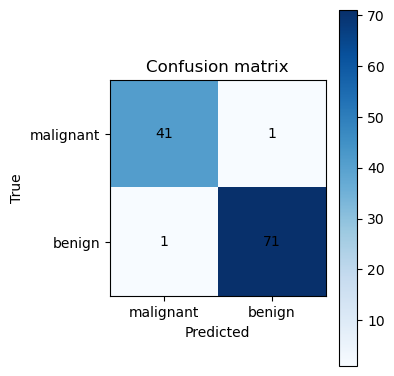

In [60]:
# Visual confusion matrix
plt.figure(figsize=(4, 4))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion matrix")
plt.colorbar()
tick_labels = data.target_names
plt.xticks([0, 1], tick_labels)
plt.yticks([0, 1], tick_labels)
plt.xlabel("Predicted")
plt.ylabel("True")

# Add numbers to each cell
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black")

plt.tight_layout()
plt.show()